In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input"))

['test.csv', 'merchants.csv', 'train.csv', 'Data_Dictionary.xlsx', 'new_merchant_transactions.csv', 'sample_submission.csv', 'historical_transactions.csv']


In [2]:
train_df = pd.read_csv('../input/train.csv', header = 0)
#train_df = train_df[train_df.target > -30]
history_df = pd.read_csv('../input/historical_transactions.csv', header = 0)

print('Train frame shape: ', train_df.shape)
print('History frame shape: ', history_df.shape)

Train frame shape:  (201917, 6)
History frame shape:  (29112361, 14)


In [3]:
new_df = pd.read_csv('../input/new_merchant_transactions.csv', header = 0)

In [4]:
new_df.authorized_flag.value_counts() # have no any NO AUTH transacts in new data

Y    1963031
Name: authorized_flag, dtype: int64

In [5]:
new_df.shape

(1963031, 14)

In [6]:
history_df = history_df[history_df.authorized_flag == 'Y']

In [7]:
#train_df = train_df[train_df.target > -30]

In [8]:
history_df['sq_purchase_amount'] = history_df['purchase_amount'].apply(lambda x: x * x)

In [9]:
history_df['purchase_amount'].describe()

count    2.659545e+07
mean    -5.887894e-01
std      5.980155e-01
min     -7.468928e-01
25%     -7.202508e-01
50%     -6.892060e-01
75%     -6.079426e-01
max      4.301697e+02
Name: purchase_amount, dtype: float64

In [10]:
history_df.head(1)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,sq_purchase_amount
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37,0.494674


**Maybe unauthorized transactions not interesting for analyzing**

# Purchase_amount aggregation

In [11]:
gb_purchase_amount = history_df.groupby('card_id')['purchase_amount'].agg([np.mean, np.std, np.median, np.min, np.max, np.sum])
gb_sq_purchase_amount = history_df.groupby('card_id')['sq_purchase_amount'].agg([np.mean, np.std, np.median, np.min, np.max, np.sum])

In [12]:
gb_sq_purchase_amount

,mean,std,median,amin,amax,sum
card_id,,,,,,
C_ID_00007093c1,0.355903,0.180452,0.355982,0.000020,1.455736,40.572913
C_ID_0001238066,0.383489,0.132656,0.423568,0.004585,0.589970,46.018687
C_ID_0001506ef0,0.492379,0.249208,0.498487,0.144461,2.230677,30.527495
C_ID_0001793786,0.766735,2.406597,0.315936,0.000373,20.740237,144.912841
C_ID_000183fdda,0.517937,0.767340,0.451282,0.000351,7.644053,70.957421
C_ID_00024e244b,0.562877,0.644438,0.516404,0.079398,5.100346,29.832484
C_ID_0002709b5a,0.435306,0.085774,0.456140,0.113356,0.529094,29.165515
C_ID_00027503e2,0.548523,0.004899,0.548840,0.538955,0.556324,13.164544
C_ID_000298032a,0.636855,1.178977,0.416697,0.275605,6.645275,17.831933


In [13]:
gb_purchase_amount.shape

(325540, 6)

In [14]:
gb_purchase_amount.index.nunique()

325540

In [15]:
gb_purchase_amount.to_csv('gb_purchase_amount_history_df.csv', header = True, index = True)
gb_sq_purchase_amount.to_csv('gb_sq_purchase_amount_history_df.csv', header = True, index = True)

In [16]:
gb_purchase_amount
gb_sq_purchase_amount

,mean,std,median,amin,amax,sum
card_id,,,,,,
C_ID_00007093c1,0.355903,0.180452,0.355982,0.000020,1.455736,40.572913
C_ID_0001238066,0.383489,0.132656,0.423568,0.004585,0.589970,46.018687
C_ID_0001506ef0,0.492379,0.249208,0.498487,0.144461,2.230677,30.527495
C_ID_0001793786,0.766735,2.406597,0.315936,0.000373,20.740237,144.912841
C_ID_000183fdda,0.517937,0.767340,0.451282,0.000351,7.644053,70.957421
C_ID_00024e244b,0.562877,0.644438,0.516404,0.079398,5.100346,29.832484
C_ID_0002709b5a,0.435306,0.085774,0.456140,0.113356,0.529094,29.165515
C_ID_00027503e2,0.548523,0.004899,0.548840,0.538955,0.556324,13.164544
C_ID_000298032a,0.636855,1.178977,0.416697,0.275605,6.645275,17.831933


# Counting num of transactions by card

In [17]:
import math
gb_transact_amount = history_df.groupby('card_id').size().sort_values(ascending = False)
gb_sqrt_transact_amount = gb_transact_amount.map(lambda x: math.sqrt(x))
gb_log2_transact_amount = gb_transact_amount.map(lambda x: math.log(x, 2))

In [18]:
gb_purchase_amount.to_csv('gb_transact_amount_history_df.csv', header = True, index = True)
gb_sqrt_transact_amount.to_csv('gb_sqrt_transact_amount_history_df.csv', header = True, index = True)
gb_log2_transact_amount.to_csv('gb_log2_transact_amount_history_df.csv', header = True, index = True)

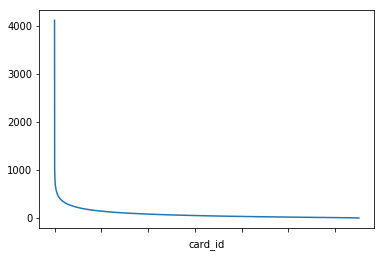

In [19]:
gb_transact_amount.plot()

In [20]:
gb_transact_amount.head()

card_id
C_ID_3d3dfdc692    4122
C_ID_0cd2ce025c    2537
C_ID_cc3d4cd4e3    2027
C_ID_5ccc07beb9    1963
C_ID_9f81506906    1592
dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


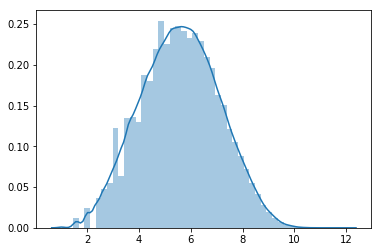

In [21]:
import seaborn as sns
sns.distplot(gb_transact_amount.map(lambda x: math.log(x, 2)))

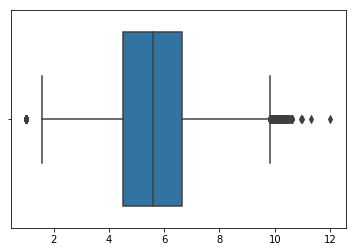

In [22]:
sns.boxplot(gb_transact_amount.map(lambda x: math.log(x, 2)))

# Categorical features creation 
**(grouping by and counting how many times for each)**

In [23]:
history_df.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,sq_purchase_amount
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37,0.494674
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16,0.537477
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37,0.518956
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34,0.540743
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37,0.522534


In [24]:
history_df.authorized_flag.value_counts()

Y    26595452
Name: authorized_flag, dtype: int64

In [25]:
history_df.installments.value_counts()

 0      14302589
 1      10591787
 2        589125
 3        464071
-1        157794
 4        147193
 6        103419
 5         93938
 10        83419
 12        35995
 8         14177
 7          7560
 9          3831
 11          548
 999           6
Name: installments, dtype: int64

In [26]:
history_df.category_1.value_counts()

N    25035393
Y     1560059
Name: category_1, dtype: int64

In [27]:
history_df.category_2.value_counts()

1.0    14076929
3.0     3594380
5.0     3480975
4.0     2428594
2.0      930272
Name: category_2, dtype: int64

In [28]:
history_df.category_3.value_counts()

A    14302589
B    10591787
C     1543282
Name: category_3, dtype: int64

In [29]:
table_1 = pd.pivot_table(history_df, index=['card_id'], columns = ['category_1'], aggfunc='size')

In [30]:
table_2 = pd.pivot_table(history_df, index=['card_id'], columns = ['category_2'], aggfunc='size')

In [31]:
table_3 = pd.pivot_table(history_df, index=['card_id'], columns = ['category_3'], aggfunc='size')

In [32]:
table_installments = pd.pivot_table(history_df, index=['card_id'], columns = ['installments'], aggfunc='size')

In [33]:
#table_authorized_flag = pd.pivot_table(history_df, index=['card_id'], columns = ['authorized_flag'], aggfunc='size')

In [34]:
table_installments.head()

installments,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,999
card_id,,,,,,,,,,,,,,,
C_ID_00007093c1,NaN,NaN,96.0,8.0,8.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C_ID_0001238066,3.0,NaN,85.0,4.0,22.0,1.0,2.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN
C_ID_0001506ef0,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C_ID_0001793786,NaN,189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C_ID_000183fdda,4.0,NaN,100.0,11.0,4.0,7.0,3.0,2.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN


In [35]:
table_2

category_2,1.0,2.0,3.0,4.0,5.0
card_id,,,,,
C_ID_00007093c1,NaN,NaN,89.0,NaN,1.0
C_ID_0001238066,94.0,NaN,NaN,NaN,18.0
C_ID_0001506ef0,2.0,NaN,60.0,NaN,NaN
C_ID_0001793786,8.0,68.0,12.0,NaN,NaN
C_ID_000183fdda,7.0,1.0,124.0,NaN,1.0
C_ID_00024e244b,3.0,NaN,50.0,NaN,NaN
C_ID_0002709b5a,1.0,49.0,NaN,NaN,11.0
C_ID_00027503e2,2.0,NaN,22.0,NaN,NaN
C_ID_000298032a,28.0,NaN,NaN,NaN,NaN


In [36]:
# last point
table_1.to_csv('table_cat_1_history_df.csv', header = True, index = True)
table_2.to_csv('table_cat_2_history_df.csv', header = True, index = True)
table_3.to_csv('table_cat_3_history_df.csv', header = True, index = True)

table_installments.to_csv('table_installments_history_df.csv', header = True, index = True)
#table_authorized_flag.to_csv('table_authorized_flag_history_df.csv', header = True, index = True)

# Merchant, city and state ID (categories counts)

In [37]:

gb_merchant_history_df = history_df.groupby('card_id')['merchant_id'].nunique()
gb_city_history_df = history_df.groupby('card_id')['city_id'].nunique()
gb_state_history_df = history_df.groupby('card_id')['state_id'].nunique()

gb_merchant_history_df

card_id
C_ID_00007093c1     28
C_ID_0001238066     65
C_ID_0001506ef0     28
C_ID_0001793786    114
C_ID_000183fdda     71
C_ID_00024e244b     18
C_ID_0002709b5a     32
C_ID_00027503e2     11
C_ID_000298032a     20
C_ID_0002ba3c2e     32
C_ID_0002c7c2c1     38
C_ID_00032df08f     58
C_ID_0003754056     14
C_ID_000377f6a0     14
C_ID_0003be3c83     67
C_ID_0003f41435    111
C_ID_00042d509c     10
C_ID_0004587331      8
C_ID_0004725b87     30
C_ID_0004888ddd     19
C_ID_0004b68c49      5
C_ID_0004c2a5ab     40
C_ID_00057b99fe     25
C_ID_000599daf9     22
C_ID_0005b2f279      7
C_ID_0005b5804f      5
C_ID_0005f16cc8     65
C_ID_0006152db8     26
C_ID_000616f4a8     29
C_ID_000664aa02     25
                  ... 
C_ID_fffb79fb56      7
C_ID_fffb9ea3f6     17
C_ID_fffba72dc5     30
C_ID_fffbdf036b     31
C_ID_fffbee5c24     16
C_ID_fffc96bf24     77
C_ID_fffcb74f49     34
C_ID_fffcf66e12     11
C_ID_fffd070e0e     23
C_ID_fffd1207a8    125
C_ID_fffd24dcf3     11
C_ID_fffd337484     20
C_I

In [38]:
gb_merchant_history_df.to_csv('gb_merchant_history_df.csv', header = True, index = True)
gb_city_history_df.to_csv('gb_city_history_df.csv', header = True, index = True)
gb_state_history_df.to_csv('gb_state_history_df.csv', header = True, index = True)

In [39]:
a = history_df.head(1000)
a

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,sq_purchase_amount
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37,0.494674
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16,0.537477
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37,0.518956
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34,0.540743
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37,0.522534
5,Y,C_ID_4e6213e9bc,333,N,0,A,80,M_ID_50af771f8d,0,-0.734887,2018-02-24 08:45:05,1.0,9,37,0.540058
6,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_5e8220e564,-11,-0.716855,2017-03-21 00:10:51,1.0,16,37,0.513881
7,Y,C_ID_4e6213e9bc,3,N,0,A,80,M_ID_9d41786a50,-3,-0.657049,2017-11-18 20:05:55,1.0,16,37,0.431714
8,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-8,-0.737967,2017-06-01 22:02:56,1.0,16,37,0.544595
9,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_74ba14b5fc,-11,-0.715352,2017-03-16 15:41:22,1.0,16,37,0.511729


In [40]:
#easy-understanding example
a.groupby('card_id')['city_id'].nunique()

card_id
C_ID_0e171c1b48     4
C_ID_48fb13e70f     2
C_ID_4e6213e9bc     6
C_ID_5037ff576e    31
C_ID_fc8e41b9cf     9
Name: city_id, dtype: int64